<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jesus Ivan Lafarga Lizarraga, Jesus Sebastian Gonzalez Ortiz

**Fecha:** 23 de noviembre del 2021.

**Expediente** : 708989 y 721621.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 8: Clase 16

### Ejercicio 1: 

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

Código de solución estudiante 1

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fix_yahoo_finance

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

#Función que regresa rendimientos logarítmicos:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [64]:
# Importar paquetes
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
from scipy.stats import norm

In [5]:
# Importar datos de MSFT
closes = get_adj_closes(tickers = ['MSFT'])
tickers = ['MSFT']        
r = 0.006/360
fr = 360*r

In [6]:
closes.head()

Symbols,MSFT
Date,
2016-11-25,56.279472
2016-11-28,56.353855
2016-11-29,56.800144
2016-11-30,56.028427
2016-12-01,55.042858


<AxesSubplot:xlabel='Date'>

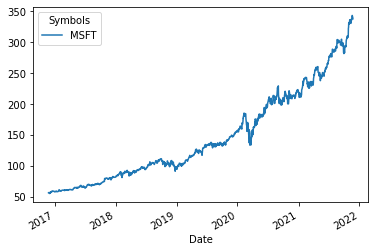

In [7]:
closes.plot()

In [8]:
precio = np.array(closes)[-1]
p = precio[0]
print("Precio activo actual:", p)

Precio activo actual: 337.67999267578125


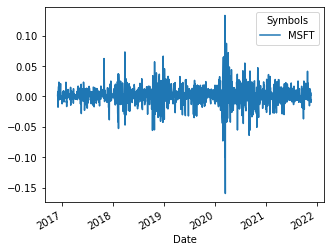

In [9]:
#Graficar rendimientos logarítmicos:
ret_MSFT = calc_daily_ret(closes)
ret_MSFT.plot(figsize=(5,4));

### Opción tipo Put que se tomará

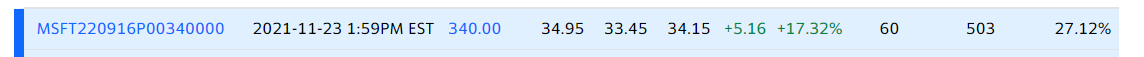

In [10]:
# Datos de opción
K = 340
Expiry = "2022-09-16"

### Simulación de precios usando rendimiento simple y logarítmico:

In [11]:
# Rendimiento simple:
Ri = closes.pct_change(1).iloc[1:]
# Media y desviación estándar de los rendimientos:
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head(3)

Symbols,MSFT
Date,
2016-11-28,0.001322
2016-11-29,0.007919
2016-11-30,-0.013587


In [12]:
today = "2021-11-23"
# Días al vencimiento de la opción
len(pd.date_range(today, Expiry, freq='B'))

214

In [13]:
nscen = 10000
# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, Expiry, freq='B')
ndays = len(dates)

In [14]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt.head(3)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-23,0.001254,0.005870,0.007461,-0.016932,-0.000730,-0.032665,-0.010452,0.022012,-0.009512,0.000429,...,-0.012653,0.004589,0.016047,0.043086,-0.047816,0.013904,0.006309,-0.000391,-0.010710,0.001223
2021-11-24,0.013848,-0.011007,-0.021567,-0.014768,-0.006674,-0.000485,-0.012838,-0.000076,0.008322,-0.021826,...,0.015345,0.003418,-0.012804,-0.013381,-0.012028,0.038840,-0.012942,-0.013017,-0.004922,0.033500
2021-11-25,0.032933,-0.012482,-0.009268,-0.021225,-0.006516,0.009823,-0.003829,-0.035473,-0.011619,-0.000739,...,0.027579,0.018160,-0.010545,-0.011450,-0.000484,0.029541,0.014180,0.014121,-0.003760,-0.013180


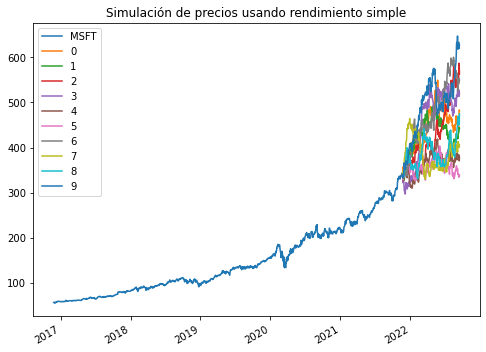

In [15]:
# Simulación del precio
S_0 = K
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0
# Se muestran los precios simulados con los precios descargados
pd.concat([closes, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### Simulación con rendimiento logarítmico:

In [16]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]
# Simulación del rendimiento
dt = 1
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )
# Simulación del precio
S_0 = closes.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

77.80965986931999

In [17]:
print("Las desviaciones estándar usando rendimientos logarítmicos y simples son parecidos: ",sigma_R,"y",sigma_r)


Las desviaciones estándar usando rendimientos logarítmicos y simples son parecidos:  0.017209829484476528 y 0.0172188304625241


### Con Black and Scholes

In [18]:
mu = ret_MSFT.mean()[0]
sigma = ret_MSFT.std()[0]
mu, sigma

(0.001425432635646226, 0.0172188304625241)

In [19]:
nscen = 10
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum().head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,-0.006345,0.006551,-0.004721,0.003558,0.015421,-0.000171,0.033909,-0.000543,-0.009733,0.024440
2021-11-24,-0.051255,0.034379,0.020232,-0.008555,0.012555,0.003415,0.048327,-0.007618,-0.001905,0.028303
2021-11-25,-0.037440,0.038858,0.019519,-0.007328,0.042108,-0.030229,0.058103,0.001681,-0.020218,-0.000877


In [20]:
S0 = closes.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,337.679993,337.679993,337.679993,337.679993,337.679993,337.679993,337.679993,337.679993,337.679993,337.679993
2021-11-24,320.808385,349.490827,344.581613,334.803553,341.946351,338.834998,354.399957,335.117425,337.037349,347.373824
2021-11-25,325.271056,351.059847,344.335994,335.214665,352.202546,327.625110,357.881406,338.248181,330.921310,337.383975


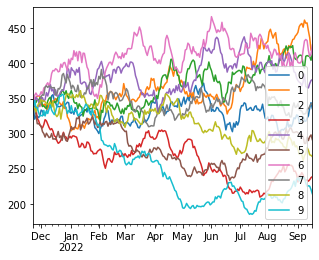

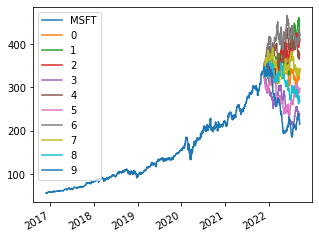

In [21]:
sim_closes.plot(figsize=(5,4));
# Se muestran los precios simulados con los precios descargados
pd.concat([closes,sim_closes]).plot(figsize=(5,4));

In [22]:
# Fechas a simular
dates = pd.date_range(start=today, periods=ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

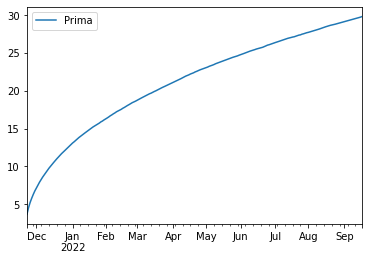

In [23]:
#PUT:
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [24]:
put

,Prima
2021-11-23,3.655795
2021-11-24,4.526929
2021-11-25,5.209514
2021-11-26,5.771569
2021-11-29,6.279665
...,...
2022-09-12,29.552669
2022-09-13,29.608314
2022-09-14,29.665018
2022-09-15,29.738741


In [25]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(29.085251089165197, 30.547714829857263)


### Usando técnicas de reducción de varianza:

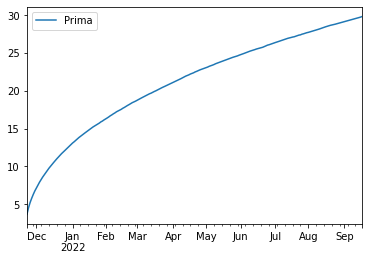

In [26]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [27]:
put

,Prima
2021-11-23,3.655795
2021-11-24,4.526929
2021-11-25,5.209514
2021-11-26,5.771569
2021-11-29,6.279665
...,...
2022-09-12,29.552669
2022-09-13,29.608314
2022-09-14,29.665018
2022-09-15,29.738741


In [28]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(29.085251089165197, 30.547714829857263)


### Análisis de la distribución de los rendimientos:

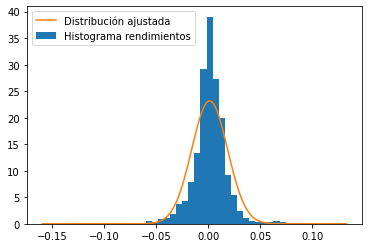

In [29]:
#AJUSTANDO_NORM
ren = calc_daily_ret(closes) # rendimientos 
y,x,_ = plt.hist(ren['MSFT'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

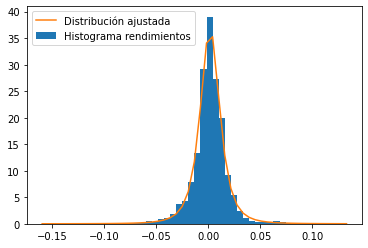

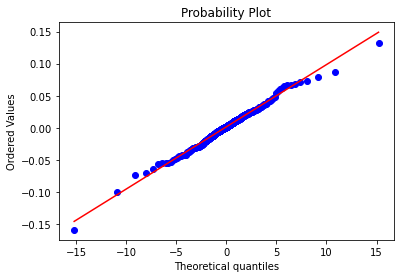

In [30]:
#AJUSTANDO_T:

# rendimientos 
ren = calc_daily_ret(closes) 
# Histograma de los rendimientos
y, x, _ = plt.hist(ren['MSFT'], bins=50, density=True, label='Histograma rendimientos')
# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 
# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()
# Q-Q
st.probplot(ren['MSFT'], sparams=params[:-2], dist=dist, plot=plt);

### Valuación usando simulación: uso del histograma de rendimientos:

In [31]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999999

In [32]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

# Fechas
dates = pd.date_range(start=today,periods=ndays)

# Rendimientos en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,-0.013262,-0.019110,0.015976,0.010128,-0.001567,0.004281,0.004281,-0.007415,-0.001567,-0.007415
2021-11-24,0.004281,0.004281,-0.019110,0.015976,-0.013262,0.015976,0.010128,-0.001567,0.004281,-0.001567
2021-11-25,0.015976,0.015976,0.004281,0.010128,0.010128,0.027671,0.027671,0.015976,0.010128,-0.007415


In [33]:
sim_closes_hist = (closes.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,333.231184,331.288255,343.118098,341.117522,337.151295,339.128610,339.128610,335.185509,337.151295,335.185509
2021-11-24,334.660717,332.709452,336.623425,346.610986,332.709452,344.590045,342.580886,334.660717,338.597645,334.660717
2021-11-25,340.050199,338.067511,338.067511,350.139432,336.096382,354.258450,352.192919,340.050199,342.044516,332.188537


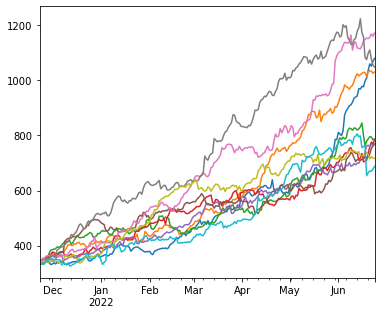

In [34]:
sim_closes_hist.plot(figsize=(6,5),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

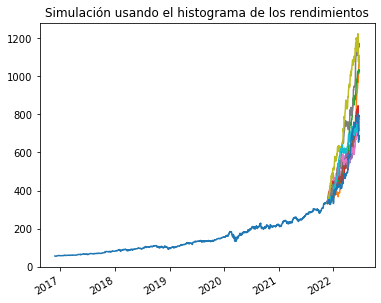

In [35]:
pd.concat([closes,sim_closes_hist]).plot(figsize=(6,5),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [36]:
ndays = len(dates)
nscen = 100000
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_MSFT+r-mu, bins=2000)
prob = freq/np.sum(freq)
# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)
# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

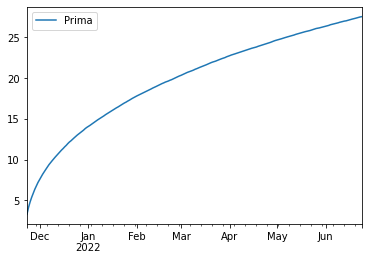

In [37]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)

put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [38]:
put

,Prima
2021-11-23,3.655795
2021-11-24,4.526929
2021-11-25,5.209514
2021-11-26,5.771569
2021-11-29,6.279665
...,...
2022-09-12,29.552669
2022-09-13,29.608314
2022-09-14,29.665018
2022-09-15,29.738741


In [39]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(26.991016509174578, 28.11149549749998)


### Black and Scholes

In [40]:
#Resolver d1 con datos previos:
v = ren["MSFT"].std()*np.sqrt(252) #para anualizar
st = p
d1 = ((fr+(v**2)/2)+np.log(st/K))/v
#resolver d2:
d2 = (d1-v)
#bs:
p1 = (np.exp(-fr)*norm.cdf(-d2)*700)
p2 = (st*norm.cdf(-d1))
bs = p1-p2
bs

235.67933212950697

### Comparando

In [41]:
#DataFrame con resultado final:
df = pd.DataFrame(index=['Valor'], columns = ['Black scholes', 'Simulación'])
df['Black scholes'] = bs
df['Simulación'] = put_hist.iloc[-1].values
df

,Black scholes,Simulación
Valor,235.679332,27.551256


Código de solución estudiante 2

In [42]:
# Importar datos de FB
closes = get_adj_closes(tickers = ['FB'])
tickers = ['FB']        
r = 0.006/360
fr = 360*r

In [43]:
closes.head()

Symbols,FB
Date,
2016-11-25,120.379997
2016-11-28,120.410004
2016-11-29,120.870003
2016-11-30,118.419998
2016-12-01,115.099998


<AxesSubplot:xlabel='Date'>

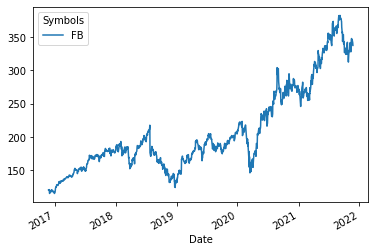

In [44]:
closes.plot()

In [45]:
precio = np.array(closes)[-1]
p = precio[0]
print("Precio activo actual:", p)

Precio activo actual: 337.25


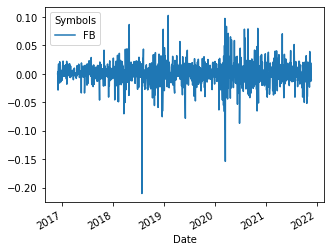

In [46]:
#Graficar rendimientos logarítmicos:
ret_FB = calc_daily_ret(closes)
ret_FB.plot(figsize=(5,4));

### Opción tipo Put que se tomará

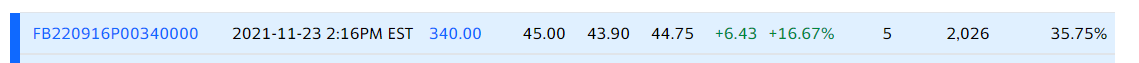

In [47]:
# Datos de opción
K = 340
Expiry = "2022-09-16"

### Simulación de precios usando rendimiento simple y logarítmico:

In [48]:
# Rendimiento simple:
Ri = closes.pct_change(1).iloc[1:]
# Media y desviación estándar de los rendimientos:
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head(3)

Symbols,FB
Date,
2016-11-28,0.000249
2016-11-29,0.003820
2016-11-30,-0.020270


In [49]:
today = "2021-11-23"
# Días al vencimiento de la opción
len(pd.date_range(today, Expiry, freq='B'))

214

In [50]:
nscen = 10000
# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, Expiry, freq='B')
ndays = len(dates)

In [51]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt.head(3)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-23,-0.010705,-0.010023,0.018244,-0.021512,-0.027516,0.024631,0.005267,-0.016496,0.018511,-0.005971,...,-0.015492,-0.048252,-0.001573,0.019207,-0.025613,0.034099,-0.015353,0.010692,0.013219,0.000116
2021-11-24,0.024379,-0.008504,-0.021429,0.004023,0.013153,0.017774,-0.022746,-0.007767,0.006673,-0.013562,...,-0.011601,0.001400,0.006090,0.005822,0.006125,-0.030638,-0.007886,0.005515,-0.017225,0.016326
2021-11-25,0.029058,-0.027285,-0.015766,-0.008512,0.030968,0.002112,0.000078,-0.022063,0.002347,0.002439,...,-0.008469,-0.027825,0.025566,0.033236,0.013878,0.036625,-0.006309,-0.013163,-0.011199,0.025838


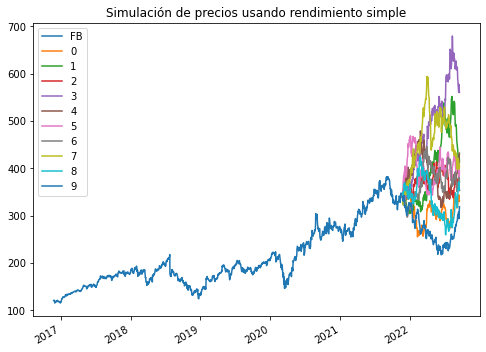

In [52]:
# Simulación del precio
S_0 = K
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0
# Se muestran los precios simulados con los precios descargados
pd.concat([closes, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### Simulación con rendimiento logarítmico:

In [53]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]
# Simulación del rendimiento
dt = 1
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )
# Simulación del precio
S_0 = closes.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

89.41252594368389

In [54]:
print("Las desviaciones estándar usando rendimientos logarítmicos y simples son parecidos: ",sigma_R,"y",sigma_r)


Las desviaciones estándar usando rendimientos logarítmicos y simples son parecidos:  0.02074836466564774 y 0.02092249708218373


### Con Black and Scholes

In [55]:
mu = ret_FB.mean()[0]
sigma = ret_FB.std()[0]
mu, sigma

(0.0008195474238537561, 0.02092249708218373)

In [56]:
nscen = 10
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum().head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,-0.013319,0.031795,-0.018902,-0.000823,-0.019048,-0.009927,0.001409,-0.014413,0.012128,-0.020994
2021-11-24,-0.022054,0.006652,-0.013220,0.015096,-0.002164,-0.029525,0.024735,0.003934,-0.023188,-0.006516
2021-11-25,-0.028390,0.024175,-0.052191,0.018199,0.002916,-0.041938,-0.008196,0.029332,-0.022559,-0.001912


In [57]:
S0 = closes.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,337.250000,337.250000,337.250000,337.250000,337.250000,337.250000,337.250000,337.250000,337.250000,337.250000
2021-11-24,329.893551,339.501028,332.821031,342.379879,336.521082,327.438161,345.695861,338.579375,329.519883,335.059528
2021-11-25,327.810141,345.502324,320.099888,343.443878,338.234955,323.398940,334.497273,347.288592,329.727114,336.605757


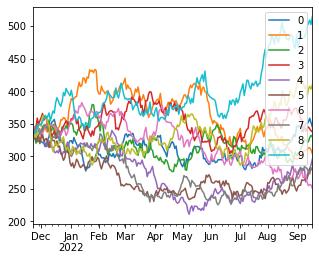

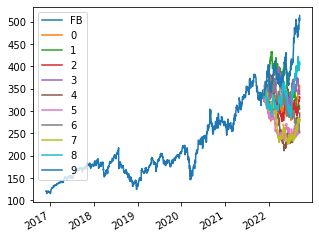

In [58]:
sim_closes.plot(figsize=(5,4));
# Se muestran los precios simulados con los precios descargados
pd.concat([closes,sim_closes]).plot(figsize=(5,4));

In [59]:
# Fechas a simular
dates = pd.date_range(start=today, periods=ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

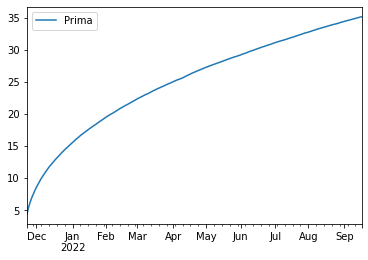

In [60]:
#PUT:
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [61]:
put

,Prima
2021-11-23,4.338254
2021-11-24,5.377911
2021-11-25,6.213321
2021-11-26,6.894817
2021-11-29,7.490484
...,...
2022-09-12,34.952498
2022-09-13,35.001039
2022-09-14,35.062526
2022-09-15,35.129818


In [65]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(34.3010573506827, 36.10928319882326)


### Usando técnicas de reducción de varianza:

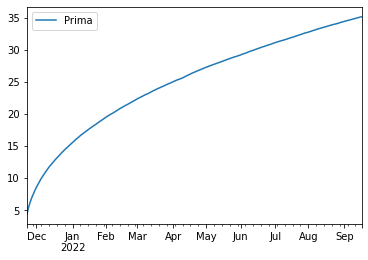

In [66]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [67]:
put

,Prima
2021-11-23,4.338254
2021-11-24,5.377911
2021-11-25,6.213321
2021-11-26,6.894817
2021-11-29,7.490484
...,...
2022-09-12,34.952498
2022-09-13,35.001039
2022-09-14,35.062526
2022-09-15,35.129818


In [68]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(34.3010573506827, 36.10928319882326)


### Análisis de la distribución de los rendimientos:

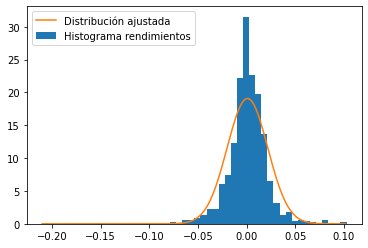

In [69]:
#AJUSTANDO_NORM
ren = calc_daily_ret(closes) # rendimientos 
y,x,_ = plt.hist(ren['FB'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

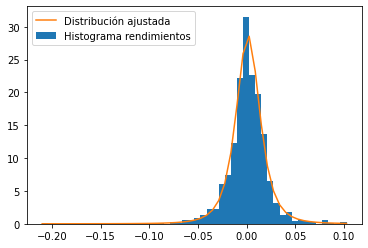

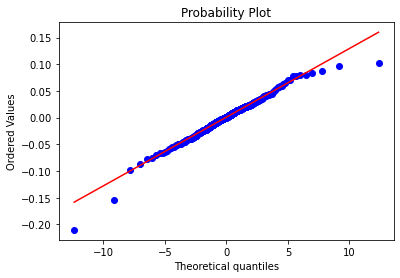

In [70]:
#AJUSTANDO_T:

# rendimientos 
ren = calc_daily_ret(closes) 
# Histograma de los rendimientos
y, x, _ = plt.hist(ren['FB'], bins=50, density=True, label='Histograma rendimientos')
# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 
# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()
# Q-Q
st.probplot(ren['FB'], sparams=params[:-2], dist=dist, plot=plt);

### Valuación usando simulación: uso del histograma de rendimientos:

In [72]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999999

In [73]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

# Fechas
dates = pd.date_range(start=today,periods=ndays)

# Rendimientos en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,-0.009955,0.008822,0.015080,0.002563,0.01508,0.021339,0.015080,0.002563,0.027598,0.002563
2021-11-24,-0.003696,-0.009955,0.002563,0.002563,0.01508,0.015080,-0.003696,0.058892,0.027598,0.015080
2021-11-25,-0.003696,0.015080,0.015080,-0.034991,0.01508,0.033857,-0.003696,0.015080,0.002563,0.015080


In [74]:
sim_closes_hist = (closes.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head(3)

,0,1,2,3,4,5,6,7,8,9
2021-11-23,333.909302,340.238212,342.374394,338.115358,342.374394,344.523989,342.374394,338.115358,346.687079,338.115358
2021-11-24,332.677377,336.867914,343.252901,338.982936,347.576652,349.758909,341.111237,358.625812,356.388231,343.252901
2021-11-25,331.449996,341.986503,348.468507,327.326856,352.857956,361.803424,339.852741,364.075004,357.302696,348.468507


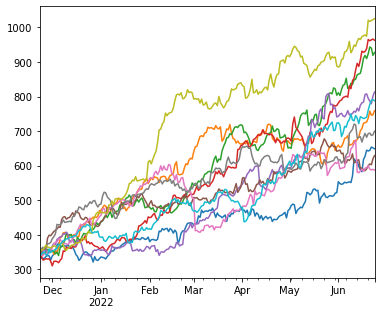

In [75]:
sim_closes_hist.plot(figsize=(6,5),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

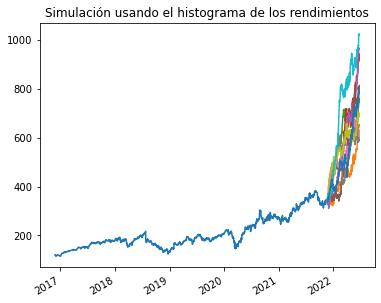

In [76]:
pd.concat([closes,sim_closes_hist]).plot(figsize=(6,5),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [77]:
ndays = len(dates)
nscen = 100000
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_FB+r-mu, bins=2000)
prob = freq/np.sum(freq)
# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)
# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

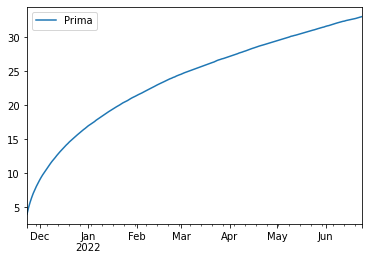

In [78]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)

put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [79]:
put

,Prima
2021-11-23,4.338254
2021-11-24,5.377911
2021-11-25,6.213321
2021-11-26,6.894817
2021-11-29,7.490484
...,...
2022-09-12,34.952498
2022-09-13,35.001039
2022-09-14,35.062526
2022-09-15,35.129818


In [80]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(32.34020937694616, 33.72643687492969)


### Black and Scholes

In [81]:
#Resolver d1 con datos previos:
v = ren["FB"].std()*np.sqrt(252) #para anualizar
st = p
d1 = ((fr+(v**2)/2)+np.log(st/K))/v
#resolver d2:
d2 = (d1-v)
#bs:
p1 = (np.exp(-fr)*norm.cdf(-d2)*700)
p2 = (st*norm.cdf(-d1))
bs = p1-p2
bs

248.30929835914372

### Comparando

In [82]:
#DataFrame con resultado final:
df = pd.DataFrame(index=['Valor'], columns = ['Black scholes', 'Simulación'])
df['Black scholes'] = bs
df['Simulación'] = put_hist.iloc[-1].values
df

,Black scholes,Simulación
Valor,248.309298,33.033323
